In [ ]:
# data: https://data.mendeley.com/datasets/j9735xjspw/1

In [ ]:
import torch

!python --version

print("Torch version:", torch.__version__)
print("\n")

if torch.cuda.is_available():
    device = torch.device("cuda")  # Use the first available GPU
    print("GPU is available, using GPU for computations.")
    print(f"GPU name:{torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead.")

Python 3.11.13
Torch version: 2.6.0+cu124


GPU is available, using GPU for computations.
GPU name:Tesla T4


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Wheat_Coccinellid.zip to Wheat_Coccinellid.zip


In [ ]:
# uncomment the below to unzip the file

# !unzip Wheat_Coccinellid.zip

In [9]:
image_data = "/content/train/images"
label_data  = '/content/train/labels'

In [10]:
import os
count = 0
image_list= []
for i in os.listdir(image_data):
  print(i)
  image_list.append(i)
  count += 1
  if count ==5:
    break;

print("\nFirst 5 images in the dataset:")
image_list

Wheat_Coccin_0642_jpg.rf.f3e0c0b8292b5c5ea6aa4c820dc34cb7.jpg
Wheat_Coccin_1016_jpg.rf.de4c3dffe541973ded6cf26e7d16c44b.jpg
Wheat_Coccin_0674_jpg.rf.436348a5024cb03be98d4639b76748a8.jpg
Wheat_Coccin_1078_jpg.rf.99b43c8e4fe705db07ee745f99668999.jpg
Wheat_Coccin_0770_jpg.rf.6e7f7cdb7b844ddc4913346a009afc73.jpg

First 5 images in the dataset:


['Wheat_Coccin_0642_jpg.rf.f3e0c0b8292b5c5ea6aa4c820dc34cb7.jpg',
 'Wheat_Coccin_1016_jpg.rf.de4c3dffe541973ded6cf26e7d16c44b.jpg',
 'Wheat_Coccin_0674_jpg.rf.436348a5024cb03be98d4639b76748a8.jpg',
 'Wheat_Coccin_1078_jpg.rf.99b43c8e4fe705db07ee745f99668999.jpg',
 'Wheat_Coccin_0770_jpg.rf.6e7f7cdb7b844ddc4913346a009afc73.jpg']

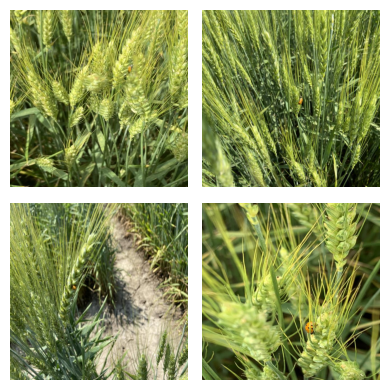

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 2, figsize=(4, 4))
axs = axs.flatten()

for i, filename in enumerate(image_list[:4]):
    img_path = os.path.join(image_data, filename)
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [12]:
# looking the 5 contents of the labels folder that is in the wheat_coccinellid_data folder

count = 0
for i in os.listdir(label_data):
  print(i)
  count +=1
  if count == 5:
    break;

Wheat_Coccin_0739_jpg.rf.fe447b25a518d41a5a5d81236f46cd13.txt
Wheat_Coccin_2075_jpg.rf.2c1a8e9dfa0a66febdbd5318e16b9575.txt
Wheat_Coccin_2058_jpg.rf.f208d61b3d10a51b37af12b8d1c42723.txt
Wheat_Coccin_0711_jpg.rf.5ec7cd3a8d78a66a8a94627d5a9508fd.txt
Wheat_Coccin_0903_jpg.rf.2f6a634eb830e4d3ecbbe5def991978d.txt


In [ ]:
count = 0
for filename in os.listdir(label_data):
  file_path = os.path.join(label_data, filename)
  with open(file_path, 'r') as f:
      content = f.read()
      print(f"Content of {filename}:\n{content}")
      count += 1
      if count == 5:
        break

Content of Wheat_Coccin_0739_jpg.rf.fe447b25a518d41a5a5d81236f46cd13.txt:
0 0.41796875 0.44296875 0.22578125 0.19140625
Content of Wheat_Coccin_2075_jpg.rf.2c1a8e9dfa0a66febdbd5318e16b9575.txt:
0 0.49453125 0.58828125 0.11484375 0.10390625
Content of Wheat_Coccin_2058_jpg.rf.f208d61b3d10a51b37af12b8d1c42723.txt:
0 0.63828125 0.45859375 0.140625 0.078125
Content of Wheat_Coccin_0711_jpg.rf.5ec7cd3a8d78a66a8a94627d5a9508fd.txt:
0 0.41015625 0.67734375 0.10390625 0.10859375
Content of Wheat_Coccin_0903_jpg.rf.2f6a634eb830e4d3ecbbe5def991978d.txt:
0 0.5359375 0.38671875 0.165625 0.1265625


In [ ]:
import pandas as pd

label_files = [f for f in os.listdir(label_data)[:5] if f.endswith('.txt')]

data = []
for label_file in label_files:
    label_path = os.path.join(label_data, label_file)
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            data.append(([label_file] + parts))

if data:
    df = pd.DataFrame(data, columns=['filename', 'class_id', 'x_center', 'y_center', 'width', 'height'])
    display(df.head())


,filename,class_id,x_center,y_center,width,height
0,Wheat_Coccin_0739_jpg.rf.fe447b25a518d41a5a5d8...,0,0.41796875,0.44296875,0.22578125,0.19140625
1,Wheat_Coccin_2075_jpg.rf.2c1a8e9dfa0a66febdbd5...,0,0.49453125,0.58828125,0.11484375,0.10390625
2,Wheat_Coccin_2058_jpg.rf.f208d61b3d10a51b37af1...,0,0.63828125,0.45859375,0.140625,0.078125
3,Wheat_Coccin_0711_jpg.rf.5ec7cd3a8d78a66a8a946...,0,0.41015625,0.67734375,0.10390625,0.10859375
4,Wheat_Coccin_0903_jpg.rf.2f6a634eb830e4d3ecbbe...,0,0.5359375,0.38671875,0.165625,0.1265625


In [13]:
image_filenames = os.listdir(image_data)[:5]

image_paths = [os.path.normpath(os.path.join(image_data, filename)) for filename in image_filenames]
label_paths = [os.path.normpath(os.path.join(label_data, filename.replace('.jpg', '.txt'))) for filename in image_filenames]

print("image paths:", image_paths)
print("\n")
print("label paths:", label_paths)
print("\n")
print("First 5 Image Paths:")
for path in image_paths:
    print(path)

print("\n")
print("First 5 Label Paths:")
for path in label_paths:
    print(path)

image paths: ['/content/train/images/Wheat_Coccin_0642_jpg.rf.f3e0c0b8292b5c5ea6aa4c820dc34cb7.jpg', '/content/train/images/Wheat_Coccin_1016_jpg.rf.de4c3dffe541973ded6cf26e7d16c44b.jpg', '/content/train/images/Wheat_Coccin_0674_jpg.rf.436348a5024cb03be98d4639b76748a8.jpg', '/content/train/images/Wheat_Coccin_1078_jpg.rf.99b43c8e4fe705db07ee745f99668999.jpg', '/content/train/images/Wheat_Coccin_0770_jpg.rf.6e7f7cdb7b844ddc4913346a009afc73.jpg']


label paths: ['/content/train/labels/Wheat_Coccin_0642_jpg.rf.f3e0c0b8292b5c5ea6aa4c820dc34cb7.txt', '/content/train/labels/Wheat_Coccin_1016_jpg.rf.de4c3dffe541973ded6cf26e7d16c44b.txt', '/content/train/labels/Wheat_Coccin_0674_jpg.rf.436348a5024cb03be98d4639b76748a8.txt', '/content/train/labels/Wheat_Coccin_1078_jpg.rf.99b43c8e4fe705db07ee745f99668999.txt', '/content/train/labels/Wheat_Coccin_0770_jpg.rf.6e7f7cdb7b844ddc4913346a009afc73.txt']


First 5 Image Paths:
/content/train/images/Wheat_Coccin_0642_jpg.rf.f3e0c0b8292b5c5ea6aa4c820dc34c

In [14]:
image_filenames = [f for f in os.listdir(image_data) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

image_label_pairs = []
for filename in image_filenames:
    image_path = os.path.join(image_data, filename)
    label_filename = filename.rsplit('.', 1)[0] + '.txt'
    label_path = os.path.join(label_data, label_filename)
    image_label_pairs.append((image_path, label_path))

print("List of tuples following format of(Image path , label path)")
print(image_label_pairs[:5])

print("\n")
print(f" Number of (Image path , label path) pairs : {len(image_label_pairs)}")

List of tuples following format of(Image path , label path)
[('/content/train/images/Wheat_Coccin_0642_jpg.rf.f3e0c0b8292b5c5ea6aa4c820dc34cb7.jpg', '/content/train/labels/Wheat_Coccin_0642_jpg.rf.f3e0c0b8292b5c5ea6aa4c820dc34cb7.txt'), ('/content/train/images/Wheat_Coccin_1016_jpg.rf.de4c3dffe541973ded6cf26e7d16c44b.jpg', '/content/train/labels/Wheat_Coccin_1016_jpg.rf.de4c3dffe541973ded6cf26e7d16c44b.txt'), ('/content/train/images/Wheat_Coccin_0674_jpg.rf.436348a5024cb03be98d4639b76748a8.jpg', '/content/train/labels/Wheat_Coccin_0674_jpg.rf.436348a5024cb03be98d4639b76748a8.txt'), ('/content/train/images/Wheat_Coccin_1078_jpg.rf.99b43c8e4fe705db07ee745f99668999.jpg', '/content/train/labels/Wheat_Coccin_1078_jpg.rf.99b43c8e4fe705db07ee745f99668999.txt'), ('/content/train/images/Wheat_Coccin_0770_jpg.rf.6e7f7cdb7b844ddc4913346a009afc73.jpg', '/content/train/labels/Wheat_Coccin_0770_jpg.rf.6e7f7cdb7b844ddc4913346a009afc73.txt')]


 Number of (Image path , label path) pairs : 2133


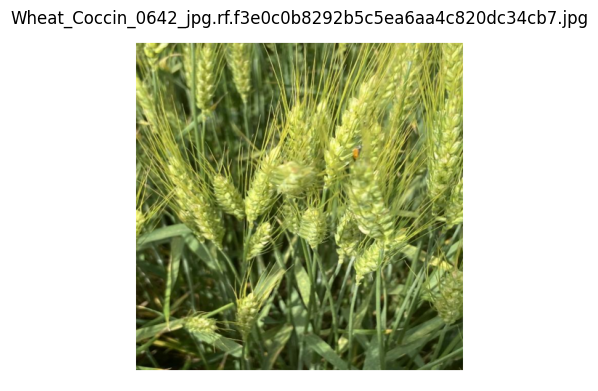

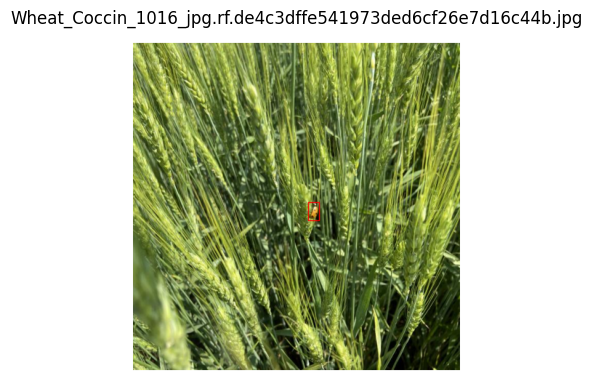

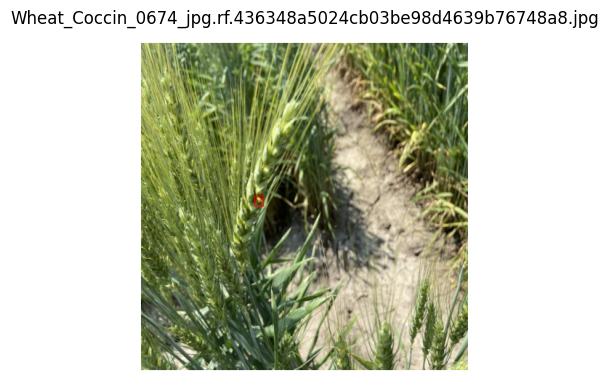

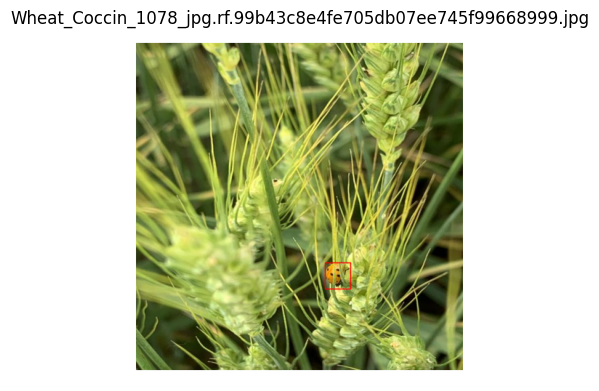

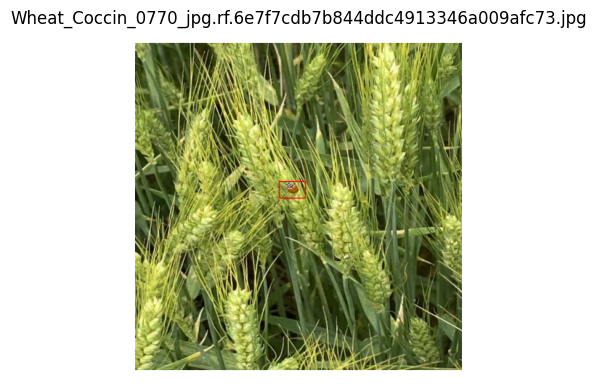

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import io
from PIL import Image

def draw_boxes_on_image(image_path, label_path):
    img = Image.open(image_path).convert("RGB")
    img_width, img_height = img.size

    fig, ax = plt.subplots(1)
    ax.imshow(img)

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)
                    x1 = (x_center - width / 2) * img_width
                    y1 = (y_center - height / 2) * img_height
                    box_width = width * img_width
                    box_height = height * img_height
                    rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=1, edgecolor='r', facecolor='none')
                    ax.add_patch(rect)


    ax.set_axis_off()
    plt.tight_layout()
    buf = io.BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    annotated_img = Image.open(buf).convert("RGB")
    plt.close(fig)

    return annotated_img


for img_path, label_path in image_label_pairs[:5]:
    annotated_img = draw_boxes_on_image(img_path, label_path)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(annotated_img)
    ax.set_title(os.path.basename(img_path))
    ax.axis('off')
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split


train_pairs, temp_pairs = train_test_split(image_label_pairs, test_size=0.2, random_state=42)
val_pairs, test_pairs = train_test_split(temp_pairs, test_size=0.5, random_state=42)

print(f"Number of training pairs: {len(train_pairs)}")
print(f"Number of validation pairs: {len(val_pairs)}")
print(f"Number of test pairs: {len(test_pairs)}")

Number of training pairs: 1706
Number of validation pairs: 213
Number of test pairs: 214


In [17]:
import yaml
import os

train_img_dir = os.path.dirname(train_pairs[0][0])
print(f"Training images directory: {train_img_dir}")
val_img_dir = os.path.dirname(val_pairs[0][0])
test_img_dir = os.path.dirname(test_pairs[0][0])

train_label_dir = os.path.dirname(train_pairs[0][1])
val_label_dir = os.path.dirname(val_pairs[0][1])
test_label_dir = os.path.dirname(test_pairs[0][1])

class_names = ['coccinellid']

data_config = {
    'train': train_img_dir,
    'val': val_img_dir,
    'test': test_img_dir,
    'nc': len(class_names),
    'names': class_names,
    'train_labels': train_label_dir,
    'val_labels': val_label_dir,
    'test_labels': test_label_dir
}

yaml_file_path = os.path.join(os.getcwd(), 'wheat_coccinellid_data.yaml')

with open(yaml_file_path, 'w') as f:
    yaml.dump(data_config, f, default_flow_style=None)

print(f"Dataset configuration saved to {yaml_file_path}")

Training images directory: /content/train/images
Dataset configuration saved to /content/wheat_coccinellid_data.yaml


In [18]:
output_folder = "/content/train/training_results"
output_folder

'/content/train/training_results'

In [ ]:
# uncomment the below libraries

# %pip install pandas
# %pip install matplotlib
# %pip install scikit-learn
# %pip install ultralytics

In [19]:
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

results = model.train(data=yaml_file_path, epochs=100, imgsz=640, batch=32, patience= 10, workers = 2,project=output_folder)


Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/wheat_coccinellid_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pr

100%|██████████| 755k/755k [00:00<00:00, 19.2MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3776275  ultralytics.nn.modules.head.Detect           [1, [192, 384, 576]]          
Model summary: 169 layers, 25,856,899 parameters, 25,856,883 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 122MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 38.3±4.4 MB/s, size: 78.3 KB)


train: Scanning /content/train/labels... 2133 images, 35 backgrounds, 0 corrupt: 100%|██████████| 2133/2133 [00:04<00:00, 474.54it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 37.4±33.5 MB/s, size: 62.9 KB)


val: Scanning /content/train/labels.cache... 2133 images, 35 backgrounds, 0 corrupt: 100%|██████████| 2133/2133 [00:00<?, ?it/s]


Plotting labels to /content/train/training_results/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/train/training_results/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.2G      1.913      2.019      1.499         28        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:30<00:00,  1.12it/s]


                   all       2133       2195   7.51e-05     0.0219   3.89e-05   9.29e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.6G      1.934      1.409      1.588         35        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]


                   all       2133       2195    0.00658      0.154    0.00182    0.00085

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.8G       1.92      1.397      1.583         36        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.14it/s]


                   all       2133       2195      0.616      0.643      0.547      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.7G      1.902      1.364      1.569         38        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]


                   all       2133       2195      0.667      0.632      0.637      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.8G      1.843      1.311      1.529         29        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.763      0.732      0.752      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.7G      1.772      1.273       1.47         42        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.20it/s]


                   all       2133       2195      0.614      0.246      0.234     0.0991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.8G       1.76      1.272       1.47         22        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]


                   all       2133       2195      0.723      0.721      0.699      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.7G      1.772      1.245       1.49         31        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]


                   all       2133       2195      0.737      0.693        0.7      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.8G      1.736      1.213      1.458         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.763       0.62      0.643      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.7G      1.744      1.226      1.461         28        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]


                   all       2133       2195      0.766      0.715      0.747       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.8G      1.731      1.198      1.457         44        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.17it/s]

                   all       2133       2195      0.764      0.708      0.709      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.7G      1.651      1.129      1.429         28        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.773      0.761      0.754      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.8G      1.674      1.136       1.45         40        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.742      0.724      0.736      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.7G      1.641      1.143      1.389         26        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.766      0.774      0.774      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.8G      1.634       1.11      1.415         47        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.809      0.773       0.82      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.7G      1.646       1.12      1.423         36        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.797      0.788        0.8      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.8G        1.6      1.094      1.372         46        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.777      0.778      0.784      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.7G       1.63      1.085      1.409         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.17it/s]

                   all       2133       2195      0.777      0.748       0.79      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.8G      1.606      1.095      1.389         29        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.797      0.795      0.804      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.7G       1.59      1.064      1.386         28        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.806      0.811       0.81      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.8G      1.598      1.058      1.372         41        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.769      0.774      0.787      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.6G      1.579      1.063       1.37         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.803      0.781      0.837       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.8G      1.566      1.044      1.364         28        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]

                   all       2133       2195      0.822      0.808      0.837      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.6G      1.574      1.061       1.37         37        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]

                   all       2133       2195      0.831      0.797      0.834      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.8G      1.543      1.047      1.376         29        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.825      0.799       0.84      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.7G      1.555      1.045      1.356         34        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.781      0.767      0.795      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.8G      1.536      1.026       1.34         31        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195       0.82        0.8      0.831      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.7G      1.538      1.033      1.352         28        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.803      0.803      0.832      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.8G      1.522      1.039      1.345         23        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.833      0.816      0.854      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.7G      1.556      1.047      1.378         32        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.825      0.797      0.845      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.8G      1.516      1.048      1.345         27        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.815      0.802      0.845      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.6G      1.505      1.005      1.336         37        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.827      0.815      0.842      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.8G      1.522      1.029      1.347         27        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.17it/s]

                   all       2133       2195      0.831      0.803      0.857      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.7G      1.483     0.9769      1.326         21        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195       0.85      0.817      0.864       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.8G      1.489      0.993      1.326         27        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.822      0.813      0.865      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.7G      1.469     0.9704      1.313         29        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.805      0.807      0.846      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.8G      1.483     0.9989      1.319         28        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.17it/s]

                   all       2133       2195       0.82      0.826      0.856      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.7G      1.466      0.993      1.307         35        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195       0.83      0.817       0.85      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.8G      1.485     0.9945      1.323         36        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.826      0.811      0.852      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.6G      1.429     0.9391      1.302         26        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.814      0.824      0.861      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.8G      1.453     0.9812      1.297         34        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.825      0.805      0.854      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.7G      1.455     0.9481      1.307         42        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.833       0.81      0.858      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.8G      1.414      0.971      1.284         32        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.841      0.811      0.873      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.6G      1.428     0.9439      1.308         33        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.17it/s]

                   all       2133       2195      0.853      0.813       0.88      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.8G      1.432     0.9764      1.301         35        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.826      0.814       0.86      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.7G      1.427     0.9492      1.299         26        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.847      0.829       0.87      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.8G      1.433     0.9521      1.297         32        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.17it/s]

                   all       2133       2195       0.84      0.815      0.858      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.7G      1.426     0.9281      1.279         28        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.837      0.814      0.875      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.8G      1.402     0.9113      1.275         39        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.836      0.819      0.866      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.6G      1.412     0.9196      1.274         31        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.836      0.822      0.866      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.8G      1.382       0.93      1.285         27        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.844      0.829      0.874      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.6G      1.398     0.9243      1.276         37        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.846      0.841      0.868      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.8G      1.395     0.9231       1.28         35        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.849      0.835      0.889      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.7G      1.365     0.8988      1.273         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.854       0.84      0.893       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.8G      1.388     0.9173      1.274         26        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.835      0.826      0.877      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.7G      1.356     0.8961      1.261         32        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.834      0.824      0.876      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.8G      1.345     0.8935       1.26         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.849       0.83      0.881      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.6G      1.342     0.8638      1.253         33        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.19it/s]

                   all       2133       2195      0.822      0.827      0.866      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.8G      1.333     0.8675      1.255         24        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.19it/s]

                   all       2133       2195      0.853      0.836      0.885      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.7G       1.33     0.8745      1.242         31        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.844      0.834      0.877      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.8G      1.311     0.8613      1.234         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.847      0.845       0.89      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.6G      1.346     0.8723      1.258         21        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.846       0.83       0.89      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.8G      1.335     0.8482      1.241         39        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.847      0.835      0.888      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.6G      1.297       0.86       1.23         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.847      0.832      0.882      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.8G      1.306      0.839       1.22         25        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.853      0.836      0.903      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.7G      1.297      0.855      1.232         34        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.846      0.837      0.895       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.7G      1.333     0.8603      1.231         42        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.862       0.83      0.906      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.6G      1.303     0.8462      1.233         37        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195       0.86      0.828      0.902      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.8G      1.288      0.838      1.222         25        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.859       0.84      0.905      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.6G      1.281     0.8411      1.221         26        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.855      0.833      0.903      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.8G       1.28     0.8379      1.216         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.855      0.846      0.902      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.6G      1.281     0.8212      1.223         31        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.857      0.838      0.915      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.8G      1.245     0.8269      1.198         33        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.854      0.844      0.899      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.7G      1.256     0.8309      1.215         34        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.858       0.84      0.903      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.8G      1.251     0.8218      1.217         36        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.17it/s]

                   all       2133       2195      0.848      0.833      0.909      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.6G      1.248     0.8011      1.217         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.858      0.847      0.914      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.8G      1.242     0.8153      1.212         29        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.855      0.847      0.911       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.7G      1.238     0.8166      1.196         27        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.858      0.849      0.919        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.8G      1.197     0.7908      1.177         24        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.846      0.867      0.919      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.7G      1.222      0.796      1.192         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.856      0.845      0.916      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.8G      1.211     0.7756      1.201         35        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.861      0.841      0.912      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.7G      1.205     0.7934      1.187         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]

                   all       2133       2195      0.865      0.852      0.918      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.8G      1.203     0.7751      1.184         30        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195       0.86      0.848      0.918      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.7G        1.2     0.7668      1.184         36        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.879      0.845      0.925      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.8G      1.197     0.7665      1.178         33        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.874      0.851      0.925      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.7G      1.189     0.7599       1.17         31        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.872      0.855      0.928      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.8G      1.171      0.773      1.161         32        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195       0.87       0.86      0.925       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.6G      1.158     0.7445      1.171         26        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.859       0.87      0.927      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.8G      1.155      0.762      1.163         27        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.878      0.866      0.932      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.7G      1.168      0.752      1.184         25        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]

                   all       2133       2195      0.872      0.856       0.93      0.641


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.8G       1.13     0.6985      1.217         23        640: 100%|██████████| 67/67 [01:07<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.869      0.858      0.929       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.7G      1.119     0.7023      1.197         22        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195       0.87      0.864      0.933      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.8G      1.095     0.6902      1.188         21        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.866      0.877      0.936      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.6G      1.079     0.6768      1.173         20        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.14it/s]

                   all       2133       2195      0.871      0.871      0.937      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.8G       1.08     0.6725      1.177         21        640: 100%|██████████| 67/67 [01:06<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.15it/s]

                   all       2133       2195      0.873      0.882       0.94      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.7G      1.085     0.6693      1.177         22        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.891      0.869      0.939      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.8G      1.085     0.6649      1.181         22        640: 100%|██████████| 67/67 [01:06<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.889      0.872      0.941      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.7G      1.053     0.6534      1.162         21        640: 100%|██████████| 67/67 [01:06<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.17it/s]

                   all       2133       2195      0.887       0.88      0.945      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.8G      1.051     0.6525      1.154         20        640: 100%|██████████| 67/67 [01:05<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:28<00:00,  1.18it/s]

                   all       2133       2195      0.885      0.877      0.944      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.7G      1.045     0.6472      1.155         20        640: 100%|██████████| 67/67 [01:05<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:29<00:00,  1.16it/s]

                   all       2133       2195      0.882      0.878      0.944      0.678



100 epochs completed in 2.870 hours.
Optimizer stripped from /content/train/training_results/train/weights/last.pt, 52.0MB
Optimizer stripped from /content/train/training_results/train/weights/best.pt, 52.0MB

Validating /content/train/training_results/train/weights/best.pt...
Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:32<00:00,  1.04it/s]


                   all       2133       2195      0.882      0.878      0.944      0.677
Speed: 0.2ms preprocess, 9.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/train/training_results/train


In [20]:
from ultralytics import YOLO

yaml_file_path = "/content/wheat_coccinellid_data.yaml"
best_model_path = "/content/train/training_results/train/weights/best.pt"
val_output_folder = "/content/evaluation_results_on_validation_data"

model = YOLO(best_model_path)
results = model.val(data=yaml_file_path, project=val_output_folder, name='valid_image_evaluation')

print("Evaluation Results:")
print(f"  mAP50: {results.results_dict['metrics/mAP50(B)']}")
print(f"  mAP50-95: {results.results_dict['metrics/mAP50-95(B)']}")
print(f"  Precision: {results.results_dict['metrics/precision(B)']}")
print(f"  Recall: {results.results_dict['metrics/recall(B)']}")

Ultralytics 8.3.167 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1913.5±830.4 MB/s, size: 87.7 KB)


val: Scanning /content/train/labels.cache... 2133 images, 35 backgrounds, 0 corrupt: 100%|██████████| 2133/2133 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 134/134 [00:53<00:00,  2.49it/s]


                   all       2133       2195      0.883       0.88      0.943      0.678
Speed: 0.4ms preprocess, 20.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/evaluation_results_on_validation_data/valid_image_evaluation2
Evaluation Results:
  mAP50: 0.9434353456163418
  mAP50-95: 0.6779909860736282
  Precision: 0.8829484053494168
  Recall: 0.8797266514806378


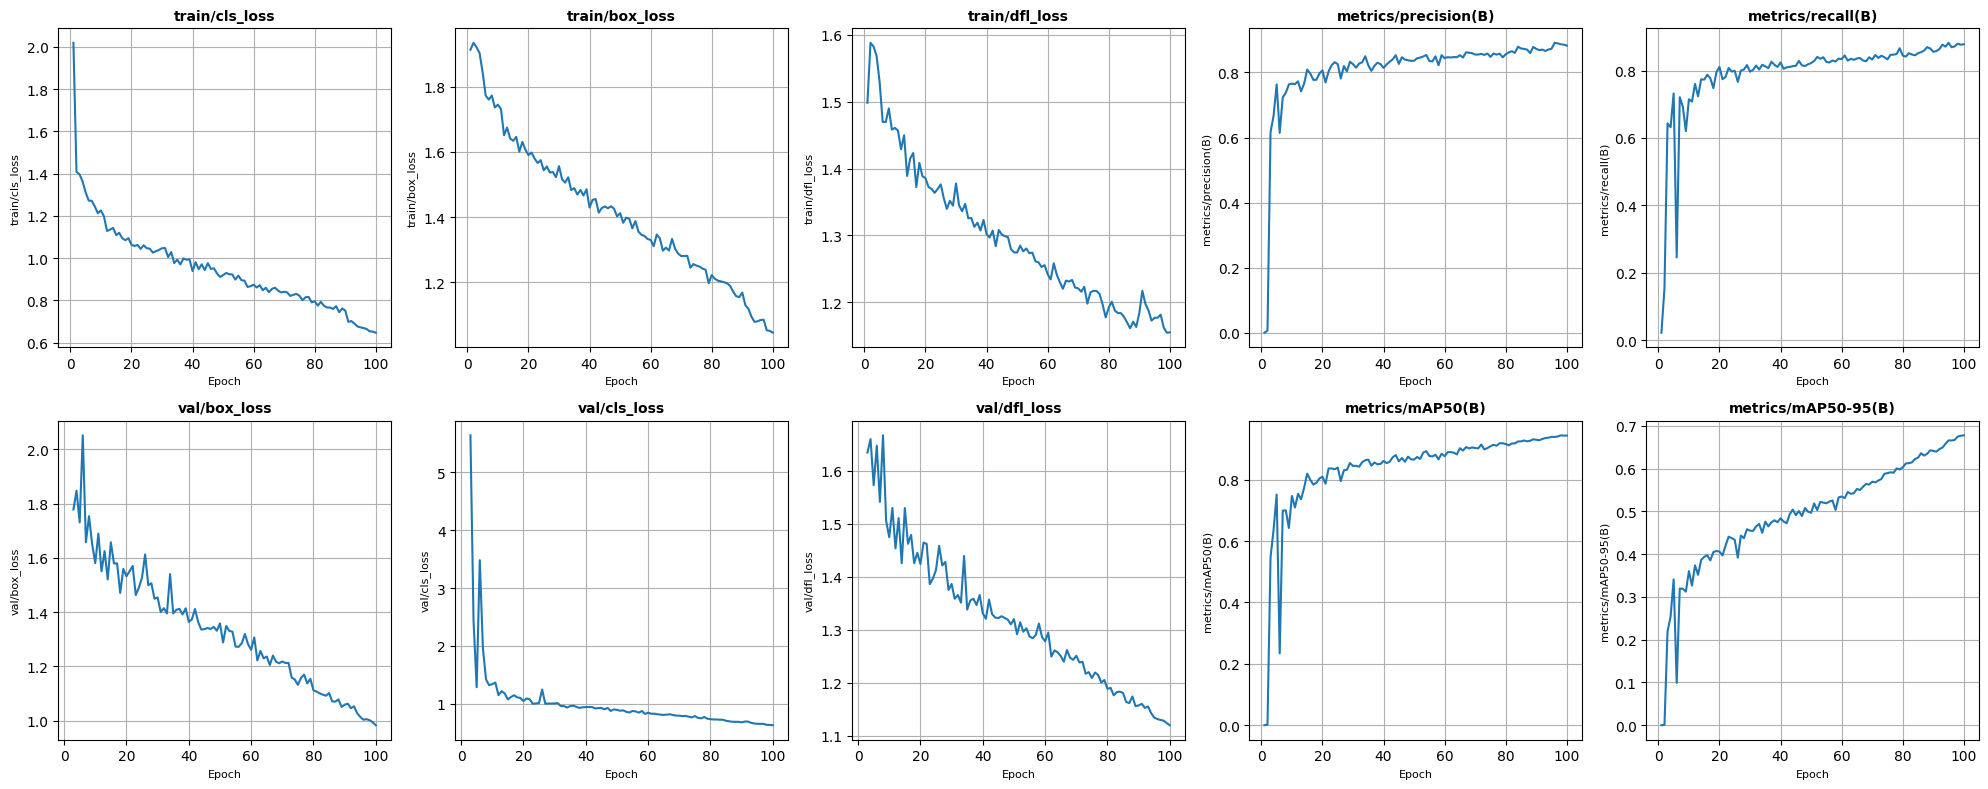

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

output_dir = "/content/train/training_results"
history_path = os.path.join(output_dir, 'train', 'results.csv')

try:
    # Read the results.csv file into a pandas DataFrame
    history_df = pd.read_csv(history_path)

    # Define the metrics to plot
    metrics_to_plot = [
        'train/cls_loss',
        'train/box_loss',
        'train/dfl_loss',
        'metrics/precision(B)',
        'metrics/recall(B)',
        'val/box_loss',
        'val/cls_loss',
        'val/dfl_loss',
        'metrics/mAP50(B)',
        'metrics/mAP50-95(B)'
    ]

    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    # Create a separate plot for each metric
    for i, metric in enumerate(metrics_to_plot):
        if metric in history_df.columns:
            axes[i].plot(history_df['epoch'], history_df[metric])
            axes[i].set_title(metric, fontsize=10, fontweight='bold')
            axes[i].set_xlabel('Epoch', fontsize=8)
            axes[i].set_ylabel(metric, fontsize=8)
            axes[i].grid(True)
        else:
            print(f"Warning: Metric '{metric}' not found in the results.csv file.")
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: The file {history_path} was not found.")
    print("Please ensure the training completed successfully and the 'results.csv' file was saved in the correct location.")
except Exception as e:
    print(f"Could not plot training history. Error: {e}")
    print("Please check the contents and format of the results.csv file.")

In [ ]:
# import os
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# from sklearn.metrics import confusion_matrix, classification_report

# val_output_folder = "/content/evaluation_results_on_validation_data/valid_image_evaluation"


# try:
#     pr_curve_path = os.path.join(val_output_folder, 'BoxPR_curve.png')

#     fig, axes = plt.subplots(1, 2, figsize=(12, 12))
#     if os.path.exists(pr_curve_path):
#         img = mpimg.imread(pr_curve_path)
#         axes[0].imshow(img)
#         axes[0].set_title("Precision-Recall Curve")
#         axes[0].axis('off')
#     else:
#         print("\nPrecision-Recall Curve plot not found.")
#         fig.delaxes(axes[0])

#     f1_curve_path = os.path.join(val_output_folder, 'BoxF1_curve.png')
#     if os.path.exists(f1_curve_path):
#         img = mpimg.imread(f1_curve_path)
#         axes[1].imshow(img)
#         axes[1].set_title("F1 Curve")
#         axes[1].axis('off')
#     else:
#         print("\nF1 Curve plot not found.")
#         fig.delaxes(axes[1])

#     plt.tight_layout()
#     plt.show()

#     confusion_matrix_path = os.path.join(val_output_folder, 'confusion_matrix.png')
#     if os.path.exists(confusion_matrix_path):
#         img = mpimg.imread(confusion_matrix_path)
#         plt.figure(figsize=(8, 8))
#         plt.imshow(img)
#         plt.title("Confusion Matrix")
#         plt.axis('off')
#         plt.show()
#     else:
#         print("\nConfusion Matrix plot not found.")

# except FileNotFoundError:
#     print(f"\nError: The directory {val_output_folder} was not found.")
#     print("Please ensure the 'val_results_dir' is correct and that the validation step completed successfully.")
# except Exception as e:
#     print(f"\nAn error occurred while trying to display the plots: {e}")

In [ ]:
# # Using test data on the model to evaluate the performance

# val_output_folder = "./output_folder/evaluation_results_on_test_data"

# # Load the trained model
# model = YOLO(best_model_path)

# # Evaluate the model on the test set and save results to Google Drive
# # The 'data' argument specifies the path to the dataset configuration file
# results = model.val(data=yaml_file_path, project=val_output_folder, split = 'test', name='test_evaluation')

# # The results object contains evaluation metrics. You can print them.
# print("Evaluation Results:")
# print(f"  mAP50: {results.results_dict['metrics/mAP50(B)']}")
# print(f"  mAP50-95: {results.results_dict['metrics/mAP50-95(B)']}")
# print(f"  Precision: {results.results_dict['metrics/precision(B)']}")
# print(f"  Recall: {results.results_dict['metrics/recall(B)']}")

# f1 = 2 * (results.results_dict['metrics/precision(B)'] * results.results_dict['metrics/recall(B)']) / (results.results_dict['metrics/precision(B)'] + results.results_dict['metrics/recall(B)'])
# print(f"F1-Score: {f1}")

In [ ]:
# from ultralytics import YOLO
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import os
# from PIL import Image # Import the Image class



# model = YOLO(best_model_path)

# custom_iou_threshold = 0.3
# if 'test_pairs' in locals() and len(test_pairs) >= 10:
#     test_image_paths = [pair[0] for pair in test_pairs[:10]]
# else:
#     print("Not enough test images available or 'test_pairs' list is not defined.")
#     test_image_paths = []

# # Run inference on the selected test images
# if test_image_paths:
#     results = model(test_image_paths, iou = custom_iou_threshold)

#     for i, result in enumerate(results):
#         im_array = result.plot()
#         im = Image.fromarray(im_array[..., ::-1])

#         plt.figure(figsize=(4, 4))
#         plt.imshow(im)
#         plt.title(f"Prediction for: {os.path.basename(test_image_paths[i])}")
#         plt.axis('off')
#         plt.show()

# else:
#     print("Could not run inference as no test images were selected.")